In [47]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import os
#train = pd.read_csv("C:/Users/celiatong/OneDrive - HKUST/Desktop/BDT/Scholarship_DA.csv")
train = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
#train = train.dropna(axis=1, how='all')

In [49]:
#train.isnull().sum()[train.isnull().sum()>2000]
train.dropna(subset=['sii','PCIAT-PCIAT_Total'], inplace =True)
train.info()

numeric_data = train.select_dtypes(include=['number'])
print(numeric_data.shape[1])
categorical_data = train.select_dtypes(exclude=['number'])
print(categorical_data.shape[1])

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

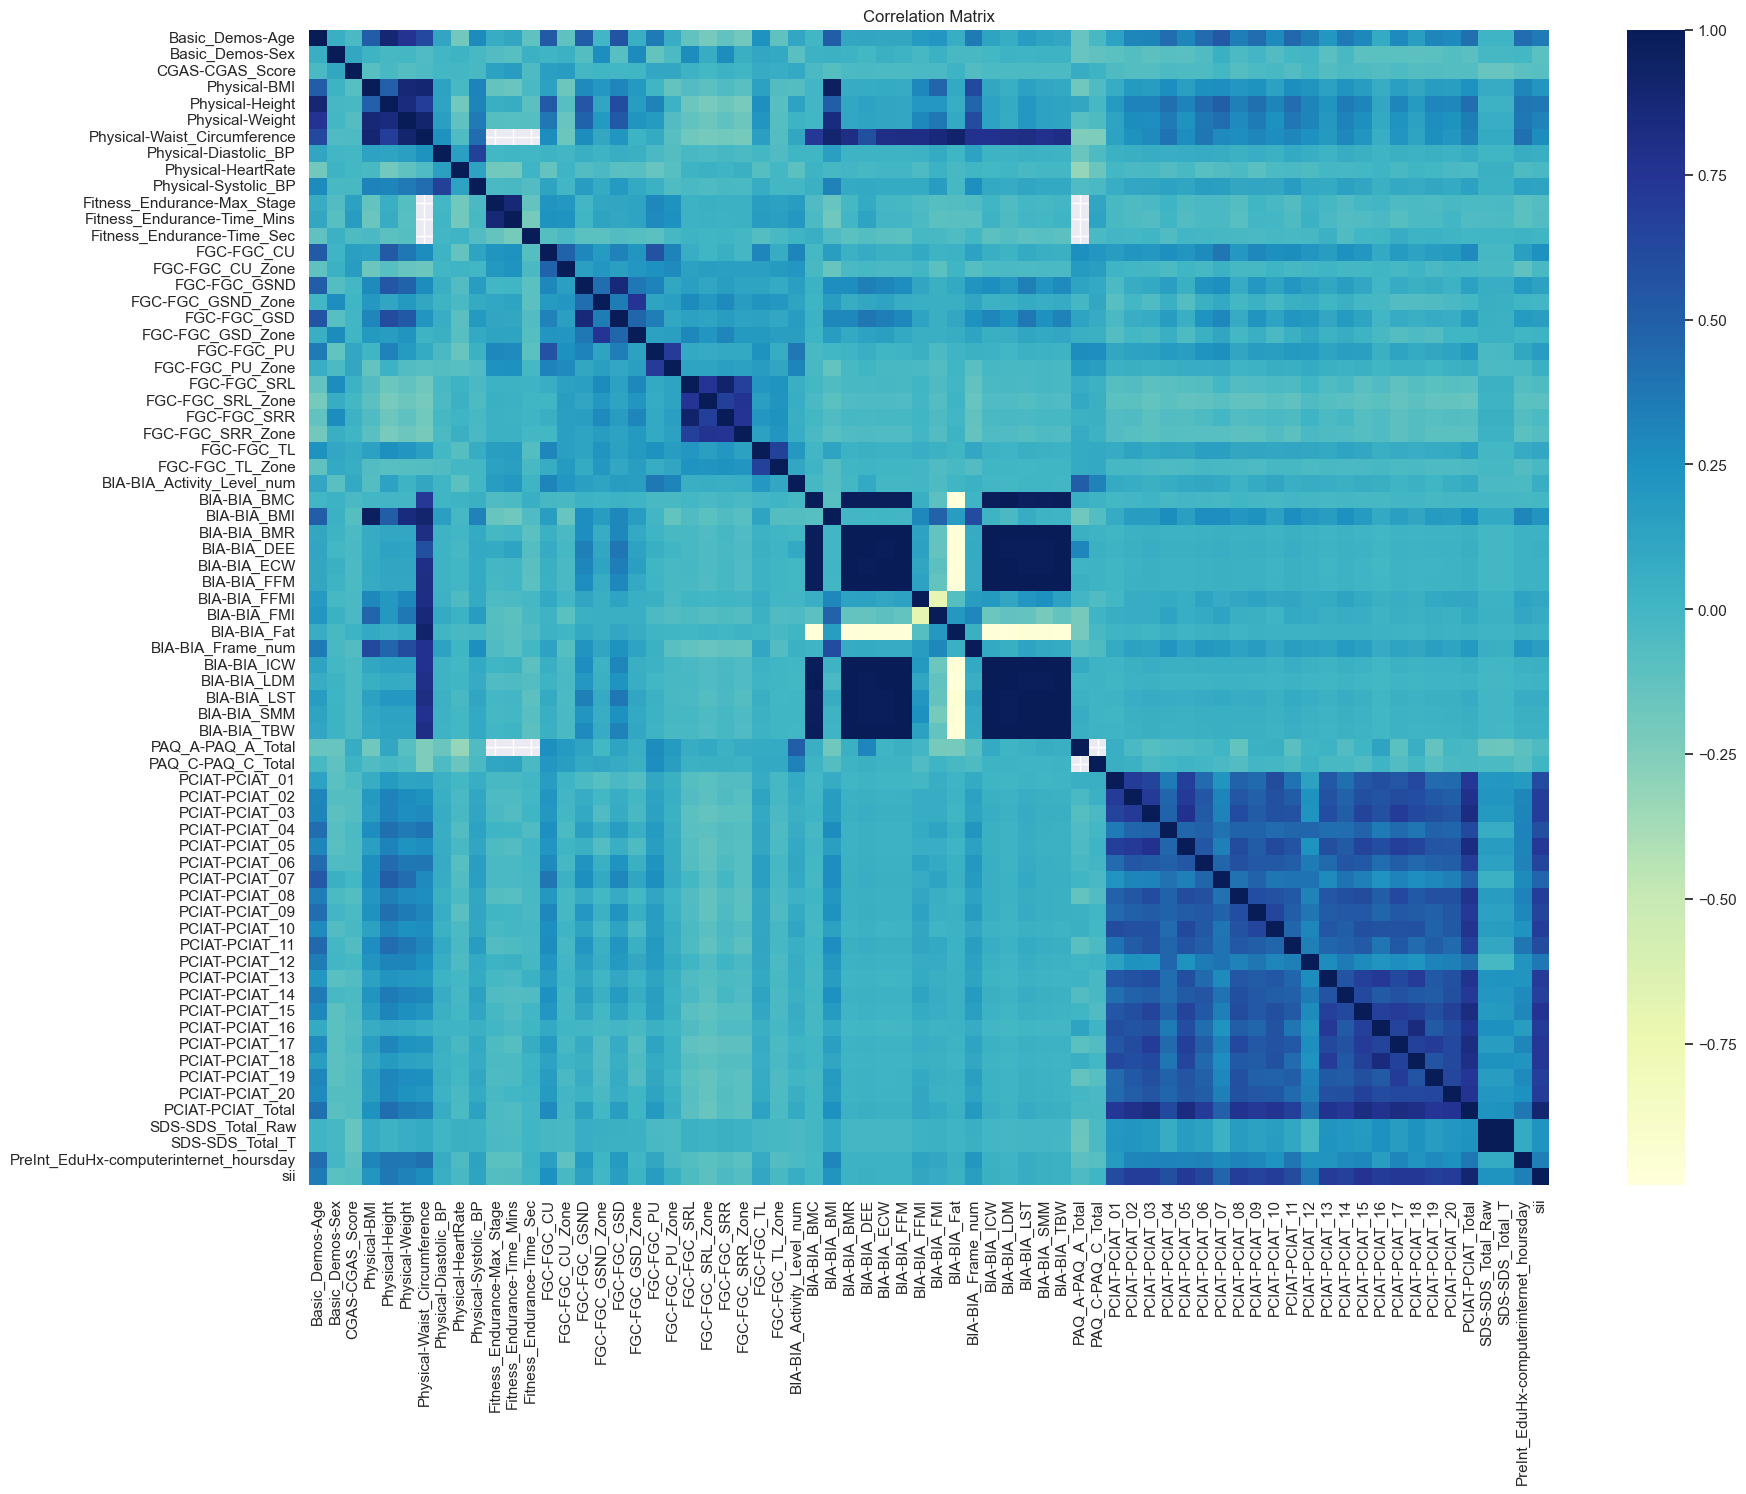

In [51]:
#matrix = numeric_data.corr()
#matrix.to_excel("Corrmat.xlsx", sheet_name='Corrmat')

# plt.imshow(matrix, cmap='Blues')

# plt.colorbar()

# variables = matrix.columns.tolist()
# plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
# plt.yticks(range(len(matrix)), variables)
sns.set (rc = {'figure.figsize':(20, 15)})
plt1 = sns.heatmap(numeric_data.corr(), cmap='YlGnBu', annot=False)
plt1.set_title('Correlation Matrix')
fig = plt1.get_figure()
fig.savefig("correlation_all.png")


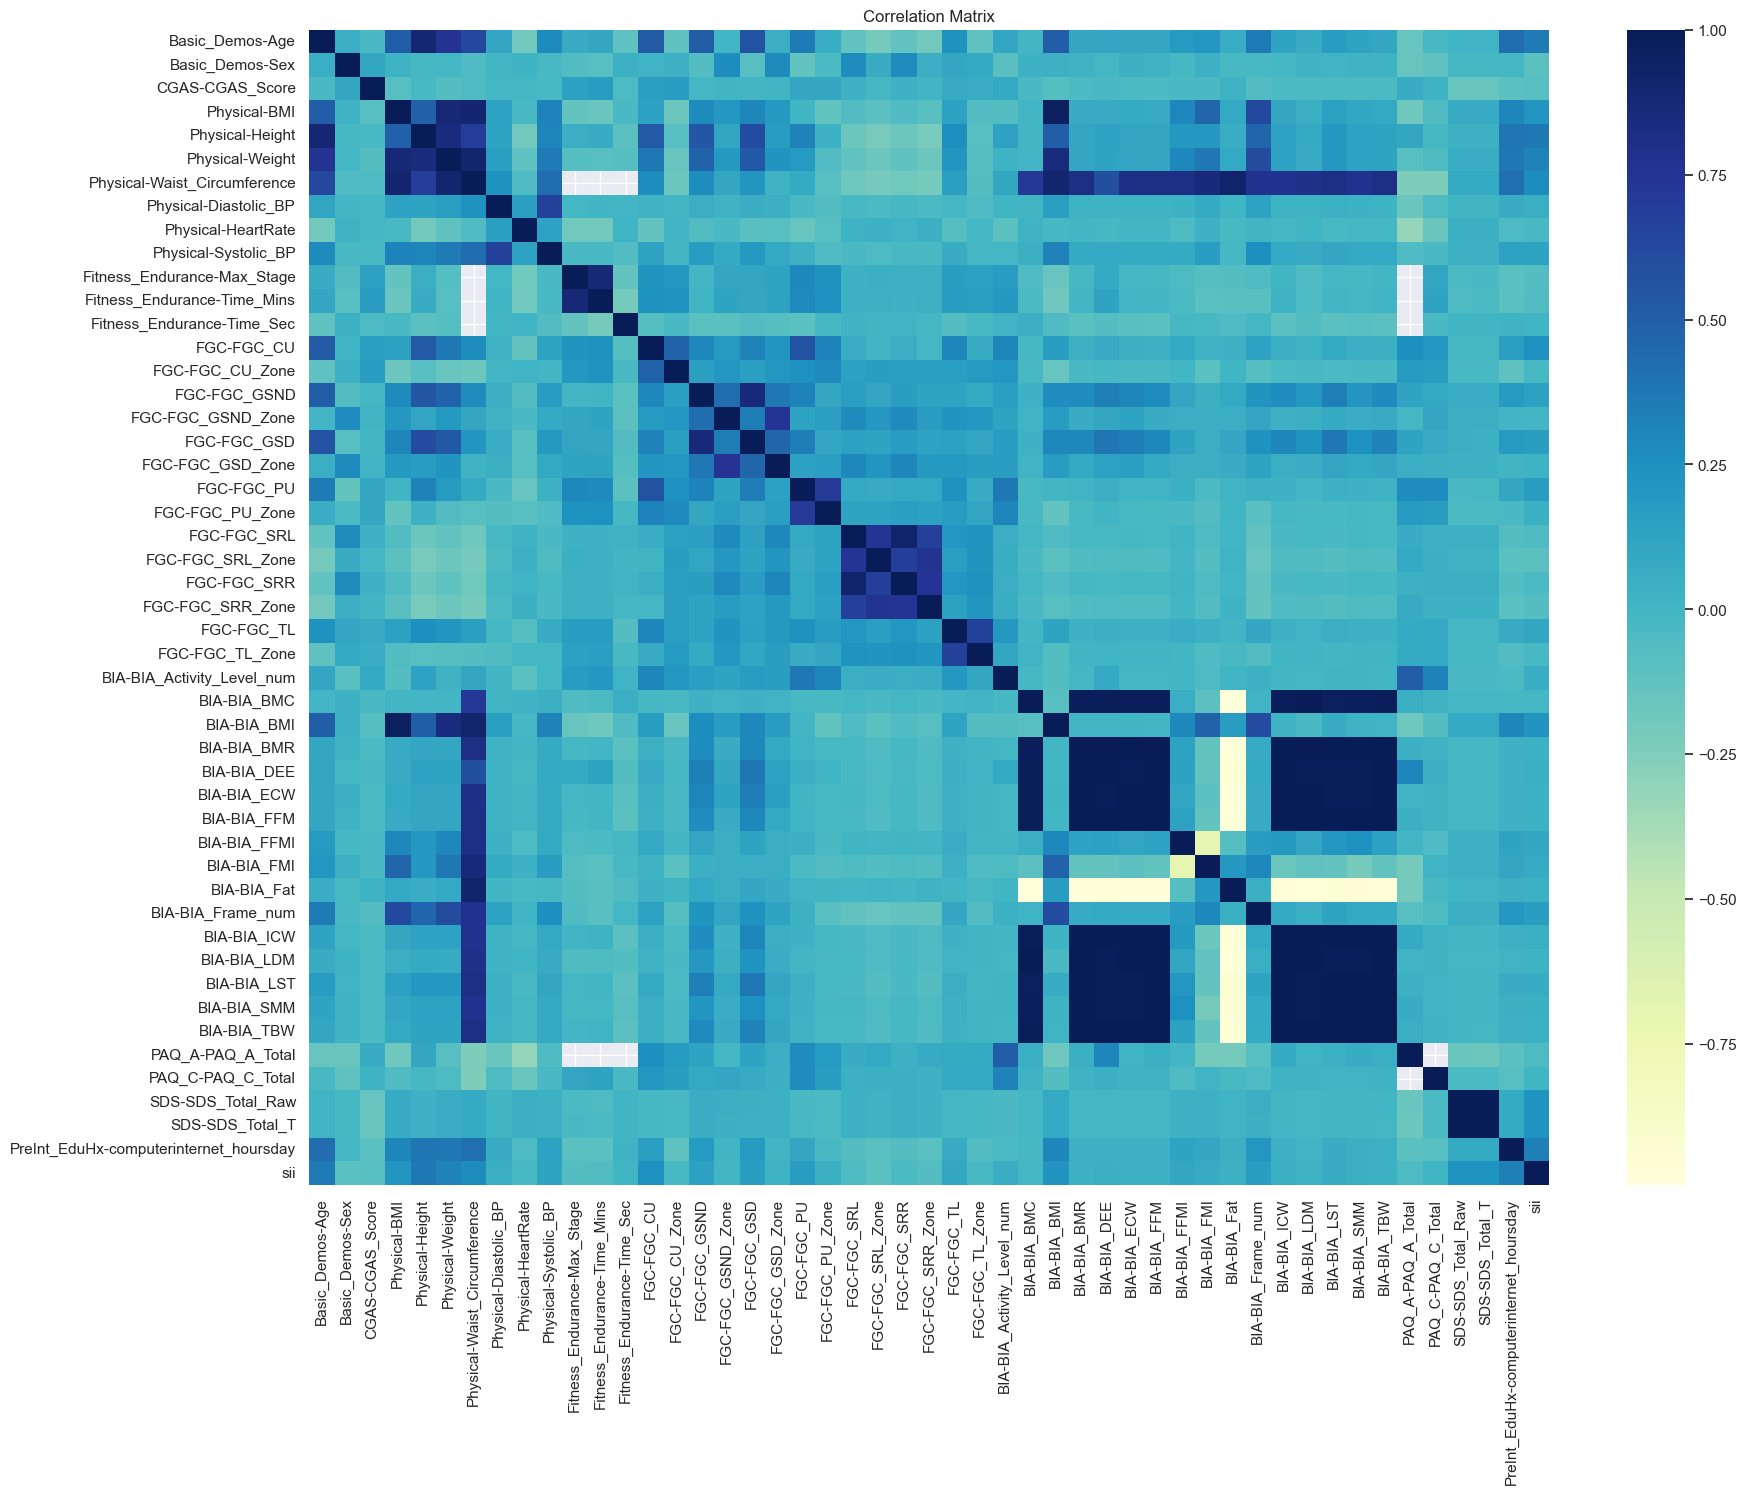

In [53]:
excludePCIAT= numeric_data.loc[:, ~numeric_data.columns.str.contains('PCIAT')]
sns.set (rc = {'figure.figsize':(20, 15)})
plt1 = sns.heatmap(excludePCIAT.corr(), cmap='YlGnBu', annot=False)
plt1.set_title('Correlation Matrix')
fig = plt1.get_figure()
fig.savefig("excludePCIAT.png")

In [57]:
matrix_abs = matrix.abs()
sorted_mat = matrix_abs.unstack().sort_values(ascending=False) 
df_sorted_mat = sorted_mat.reset_index()
df_sorted_mat.columns = ['v1', 'v2', 'correlation']
df_sorted_mat = df_sorted_mat[df_sorted_mat['v1'] != df_sorted_mat['v2']]
df_sorted_mat.to_excel("Corrmat_abs.xlsx", sheet_name='Corrmat_abs', index=False)

In [58]:
selected_columns = pd.read_excel("data_dictionary.xlsx")
selected_columns = selected_columns[selected_columns['Selected'] == 'Y']
Field = selected_columns['Field'].tolist()
print (Field)

['Basic_Demos-Age', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'BIA-BIA_BMI', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday', 'sii']


In [61]:
selected_var = numeric_data[Field]
print(selected_var.columns.tolist())

['Basic_Demos-Age', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'BIA-BIA_BMI', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday', 'sii']


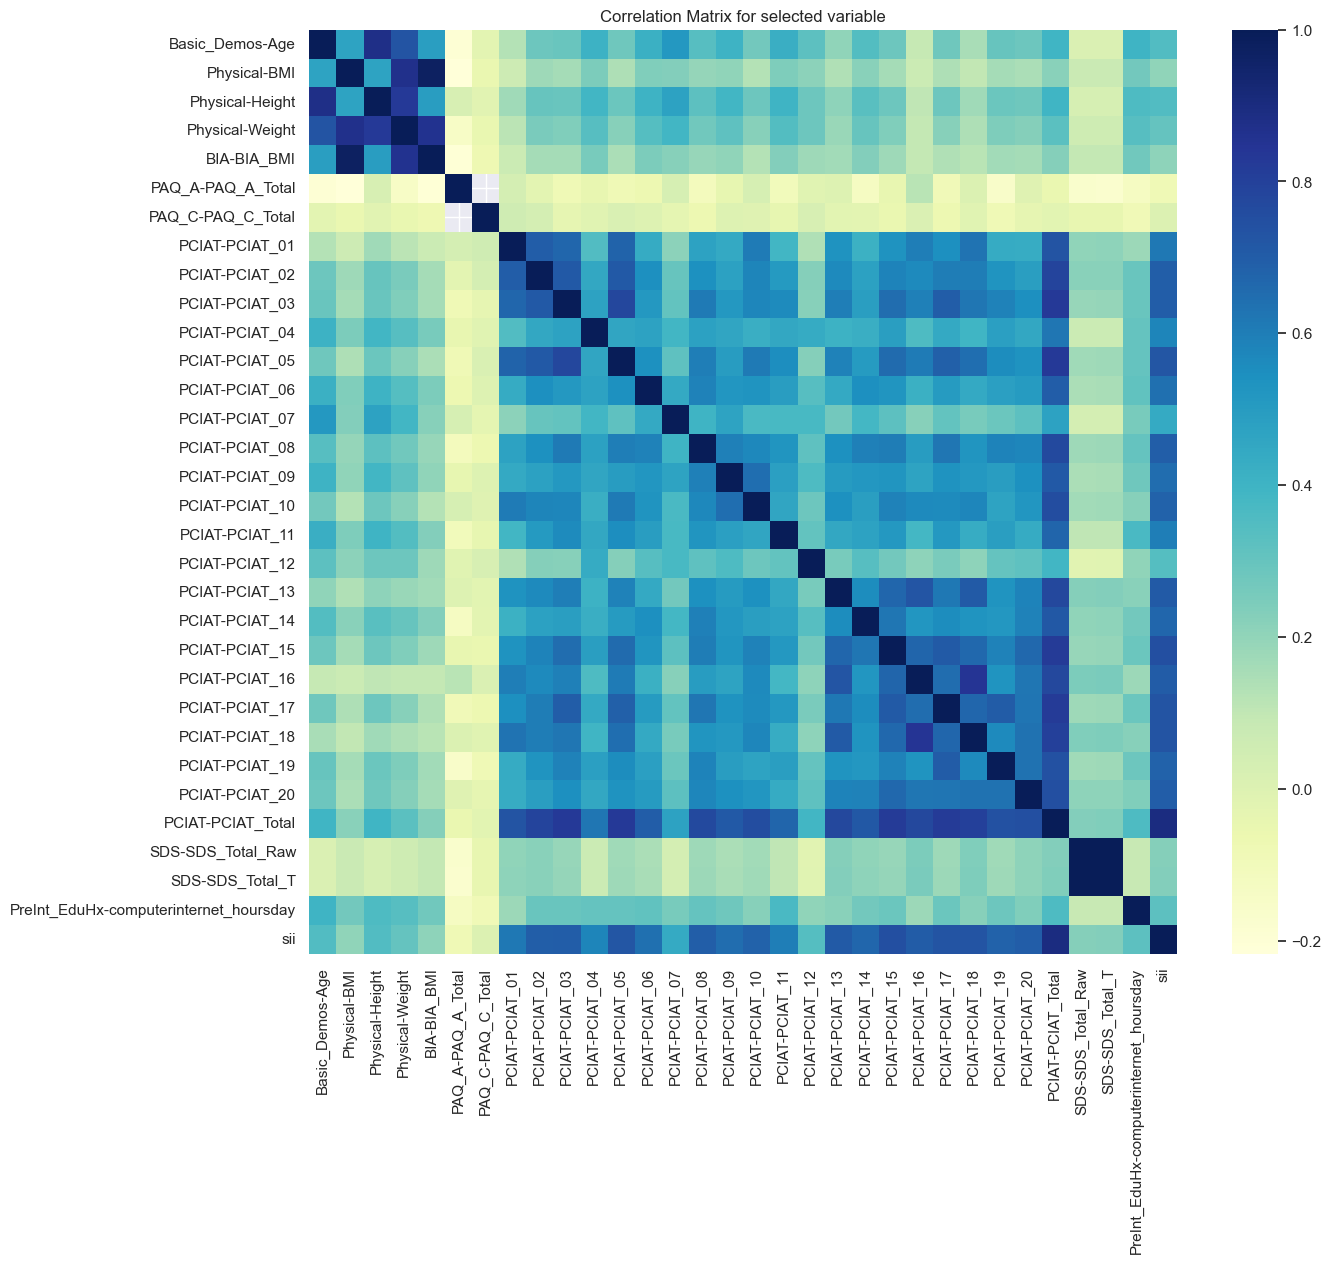

In [63]:
#After filter manually

#matrix = selected_var.corr()
# matrix.to_excel("Corrmat.xlsx", sheet_name='Corrmat')
# matrix_abs = matrix.abs()
# matrix_abs.to_excel("Corrmat_abs.xlsx", sheet_name='Corrmat')
# plt.imshow(matrix, cmap='Blues')

# plt.colorbar()

# variables = matrix.columns.tolist()
# plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
# plt.yticks(range(len(matrix)), variables)

# plt.title('Correlation Matrix')
# plt.show()

plt2 = sns.heatmap(selected_var.corr(), cmap='YlGnBu', annot=False)
plt2.set_title('Correlation Matrix for selected variable')
fig2 = plt2.get_figure()
fig2.savefig("correlation_selected.png")

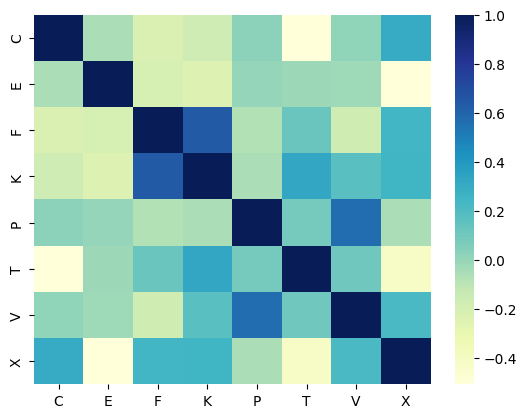

In [43]:
from numpy.random import randn  
from seaborn import heatmap 
from matplotlib.pyplot import show 

absThresh = 0.5

def absHighPass(df_sorted_mat, absThresh):
    passed = set()
    for v1 in df_sorted_mat.columns:
        for v2 in df_sorted_mat.columns:
            if v1 != v2 and abs(df_sorted_mat.loc[v1, v2]) >= absThresh:
                passed.add(v1)
                passed.add(v2)
    passed = sorted(passed)  
    return df_sorted_mat.loc[passed, passed]  

labels = [chr(x) for x in range(64, 90)]  


corrDf = DataFrame(randn(26, 26), index=labels, columns=labels).corr()  

heatmap(absHighPass(corrDf, 0.5), cmap="YlGnBu")
show()

<Axes: >

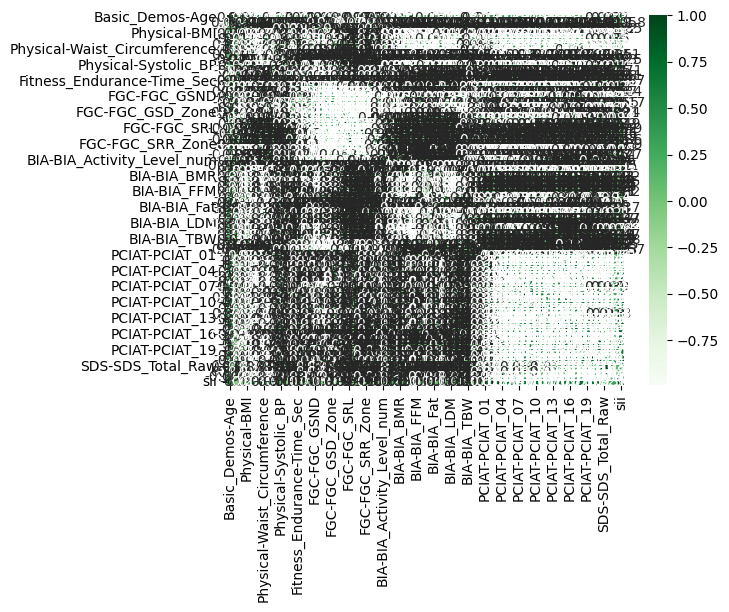

In [44]:
sns.heatmap(matrix, cmap="Greens", annot=True)

In [47]:
dependent_variable = 'sii'

correlations = {}
for column in train.columns:
    if column != dependent_variable:
        try:
            correlation = train[column].astype(float).corr(train[dependent_variable].astype(float))
            correlations[column] = correlation
        except ValueError:
            print(f'Skipping column {column} due to non-numeric data.')

correlation_df = pd.DataFrame(correlations.items(), columns=['Variable', 'Correlation'])
correlation_df.to_excel("correlation_results.xlsx", index=False,engine='openpyxl')

Skipping column id due to non-numeric data.
Skipping column Basic_Demos-Enroll_Season due to non-numeric data.
Skipping column CGAS-Season due to non-numeric data.
Skipping column Physical-Season due to non-numeric data.
Skipping column Fitness_Endurance-Season due to non-numeric data.
Skipping column FGC-Season due to non-numeric data.
Skipping column BIA-Season due to non-numeric data.
Skipping column PAQ_A-Season due to non-numeric data.
Skipping column PAQ_C-Season due to non-numeric data.
Skipping column PCIAT-Season due to non-numeric data.
Skipping column SDS-Season due to non-numeric data.
Skipping column PreInt_EduHx-Season due to non-numeric data.


In [31]:
from sklearn.decomposition import PCA

In [37]:
from scipy import stats
cleaned_data = train[['FYES CAE_005R1', 'Latest CGA']].dropna()
print(cleaned_data.describe())
correlation_coefficient, p_value = stats.pearsonr(cleaned_data['FYES CAE_005R1'], cleaned_data['Latest CGA'])
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

       FYES CAE_005R1    Latest CGA
count    13217.000000  13217.000000
mean         4.464553      2.969848
std          1.213313      0.551949
min          1.000000      0.307000
25%          4.000000      2.635000
50%          4.000000      3.008000
75%          5.000000      3.353000
max          7.000000      4.229000
Pearson correlation coefficient: -0.13141567609543778
P-value: 5.367066474980924e-52


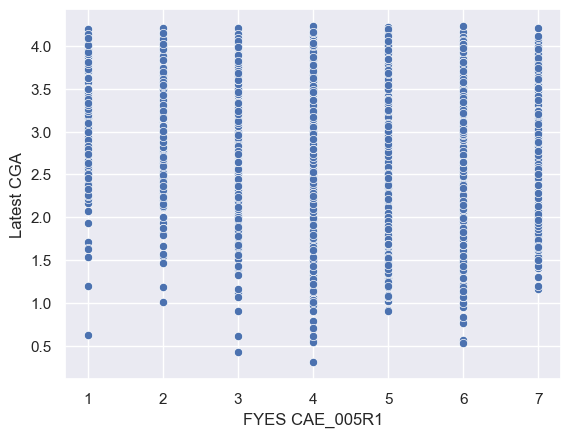

In [36]:
import seaborn as sns
sns.scatterplot(x="FYES CAE_005R1", y="Latest CGA", data=train);